<a href="https://colab.research.google.com/github/kumarlova/Credit-Card-Default-Prediction/blob/main/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 5.5 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [4]:
import xlrd

In [5]:
#Importing the Excel file
df=pd.read_excel('/content/drive/MyDrive/Credit card fraud detection/default of credit card clients.xls',header=1)

In [6]:
#Top 5 Rows of Data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
#Last rows
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [8]:
#Checking null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

###There is no null values in our data set.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [10]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
#Rows and columns
df.shape

(30000, 25)

In [12]:
#Checking for numerical columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [13]:
#About columns
dict1 = {}
for i in list(df.columns):
  dict1.update({i:df[i].nunique()})
dict1

{'AGE': 56,
 'BILL_AMT1': 22723,
 'BILL_AMT2': 22346,
 'BILL_AMT3': 22026,
 'BILL_AMT4': 21548,
 'BILL_AMT5': 21010,
 'BILL_AMT6': 20604,
 'EDUCATION': 7,
 'ID': 30000,
 'LIMIT_BAL': 81,
 'MARRIAGE': 4,
 'PAY_0': 11,
 'PAY_2': 11,
 'PAY_3': 11,
 'PAY_4': 11,
 'PAY_5': 10,
 'PAY_6': 10,
 'PAY_AMT1': 7943,
 'PAY_AMT2': 7899,
 'PAY_AMT3': 7518,
 'PAY_AMT4': 6937,
 'PAY_AMT5': 6897,
 'PAY_AMT6': 6939,
 'SEX': 2,
 'default payment next month': 2}

In [14]:
numerical_columns=df.describe().columns
numerical_columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

##**EDA**

###**Univatiate Analysis**

###**(i)Independent variable**

In [15]:
##Dependent variable
df.rename(columns={'default payment next month' : 'Defaulter'}, inplace=True)

In [16]:
#Dependent variable value count
df['Defaulter'].value_counts()

0    23364
1     6636
Name: Defaulter, dtype: int64

Text(0.5, 1.0, 'default payment next month')

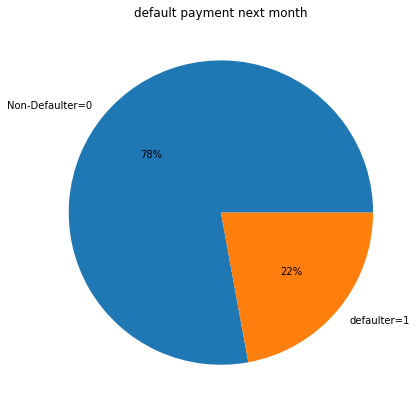

In [17]:
#Pie plot
fig, ax = plt.subplots(figsize = (15, 30))

plt.subplot(3,2,1)
labels = 'Non-Defaulter=0', 'defaulter=1'
plt.pie(df['Defaulter'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("default payment next month")

###from the above data we can conclude that

1.Non-defaulter were 23364, Defaulter were 6636

2.The above pie charts said Non-defaulters 78% ,and defaulter were 22%

###**(ii)Independent variables**

####**(a)Credit limit balance**

In [18]:
#Credit limit
df['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

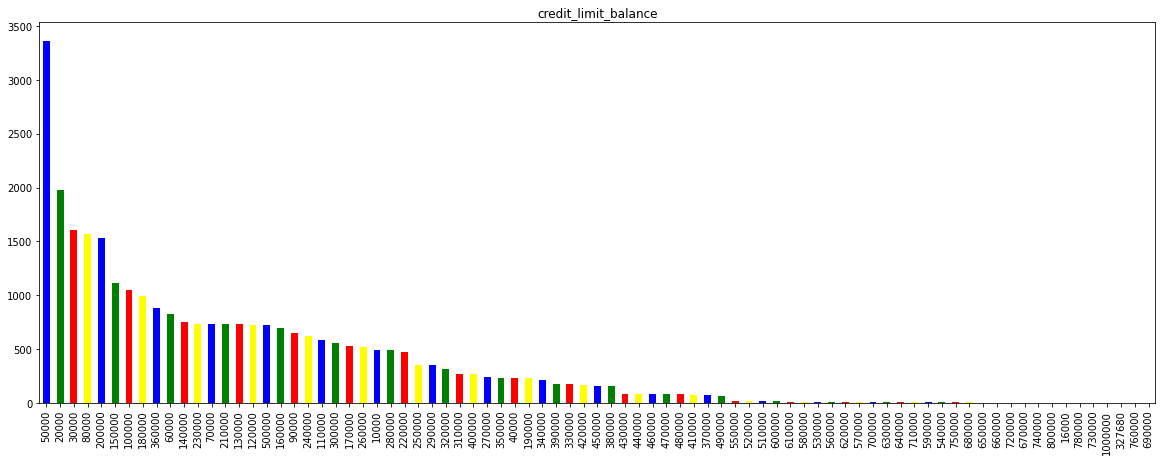

In [19]:
plt.figure(figsize=(20,7))
df['LIMIT_BAL'].value_counts().plot(kind="bar",color={"blue","green","red","yellow"})
plt.title("credit_limit_balance")
plt.show()

In [20]:
df['LIMIT_BAL'].max()

1000000

In [21]:
df['LIMIT_BAL'].min()

10000




*   From the above data we can conclude that most of people
available credit balance is 50,000 to 3365 members.
*   Maximum available credit balance limit is 1,00,000.

*   Minimum available credit balance limit is 10,000.








###**(b)Sex**
Male-1

Female-2

In [22]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

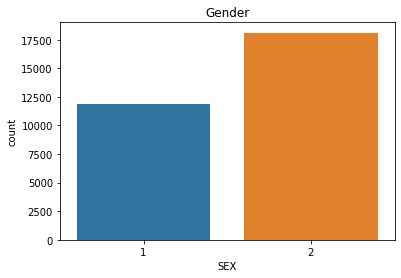

In [23]:
sns.countplot(df['SEX'])
plt.title("Gender")
plt.show()



###  From the above data 
we can conclude that male are 
11,888 represented as 1 and female are 18,112 represented as 2  are having the credit cards.







###**(c)Education**
1 = graduate school

2 = university

3 = high school

4,5,6 = others

In [24]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

###In descption of dataset said except 1,2,3 any other number taken count as 4 so in our data of education others data also available number as 4,5,6 so all this numbers convert into as 4 only

In [25]:
df["EDUCATION"]=df["EDUCATION"].replace({5:4,6:4,0:4})

In [26]:
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

<function matplotlib.pyplot.show>

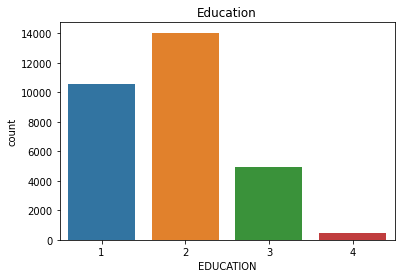

In [27]:
sns.countplot(df['EDUCATION'])
plt.title("Education")
plt.show

###From the above data we can conclude that Education in


*  University people having high credit cards with number 14,030.
*  Graduate school people having  second highest credit cards with number 10,585.



*  Graduate school people having  second lowest credit cards with number 4917.
*  Other studying people having  lowest credit cards with number 468 .




###**(d)Marriage**

Married = 1

Singles = 2

others = 3

In [28]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In our data describe about married persons represented with 1, singles represented with 2, others represented with 3, but out dataset include "0" but it tells about anything so we simply move to others category.

In [29]:
df['MARRIAGE']=df['MARRIAGE'].replace({0:3})

In [30]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Text(0.5, 1.0, 'Marital status')

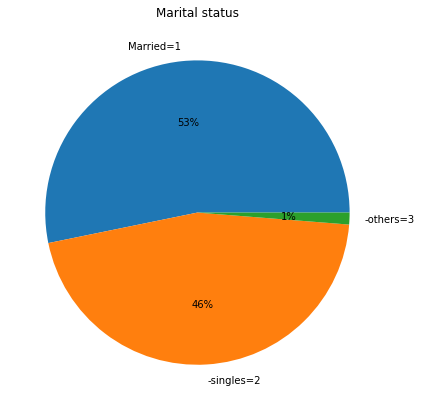

In [31]:
#Pie plot
fig, ax = plt.subplots(figsize = (15, 30))

plt.subplot(3,2,1)
labels =  'Married=1',  '-singles=2',  '-others=3'
plt.pie(df['MARRIAGE'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Marital status")

From the above pie chart we can say that

1.married people were 46%

2.singles were 53%

3.others were 1%

###**(e)Age**

In [32]:
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

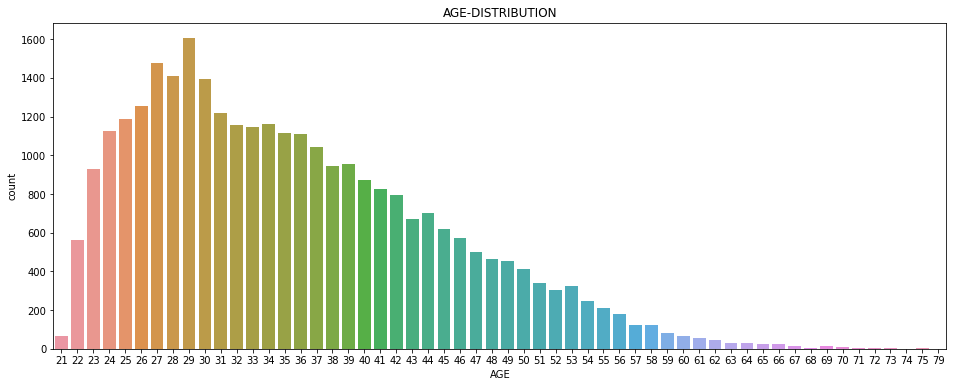

In [33]:
plt.figure(figsize=(16,6))
sns.countplot(df['AGE'])
plt.title("AGE-DISTRIBUTION")
plt.show()

From the above data we can conclude that
 
1.most of credit cardholders AGE was 25-45 and above age 60 people are used rarely creditcards

2.most of 29th age people used huge credit cards that number is 1605 and second place was 27th age people it's number 1477

###**(f)Remaining columns**

In [34]:
# renameing column Names
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [35]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [36]:
#checking for duplicates
len(df[df.duplicated()])

0

###No duplicate columns in our data set.

###**(g)Bill AMOUNT**

In [37]:
print(df['BILL_AMT_APR'].value_counts())
print("\n")
print("\n")


print(df['BILL_AMT_MAY'].value_counts())
print("\n")
print("\n")

print(df['BILL_AMT_JUN'].value_counts())
print("\n")
print("\n")

print(df['BILL_AMT_JUL'].value_counts())
print("\n")
print("\n")

print(df['BILL_AMT_AUG'].value_counts())
print("\n")
print("\n")

print(df['BILL_AMT_SEPT'].value_counts())

0         4020
390        207
780         86
150         78
316         77
          ... 
26852        1
108660       1
480          1
15298        1
15313        1
Name: BILL_AMT_APR, Length: 20604, dtype: int64




0        3506
390       235
780        94
316        79
326        62
         ... 
19341       1
66726       1
80682       1
28508       1
32428       1
Name: BILL_AMT_MAY, Length: 21010, dtype: int64




0         3195
390        246
780        101
316         68
326         62
          ... 
97189        1
118839       1
23567        1
18377        1
36535        1
Name: BILL_AMT_JUN, Length: 21548, dtype: int64




0         2870
390        275
780         74
326         63
316         62
          ... 
19580        1
45129        1
227807       1
39330        1
49764        1
Name: BILL_AMT_JUL, Length: 22026, dtype: int64




0        2506
390       231
326        75
780        75
316        72
         ... 
26357       1
85195       1
6889        1
11004       1
489

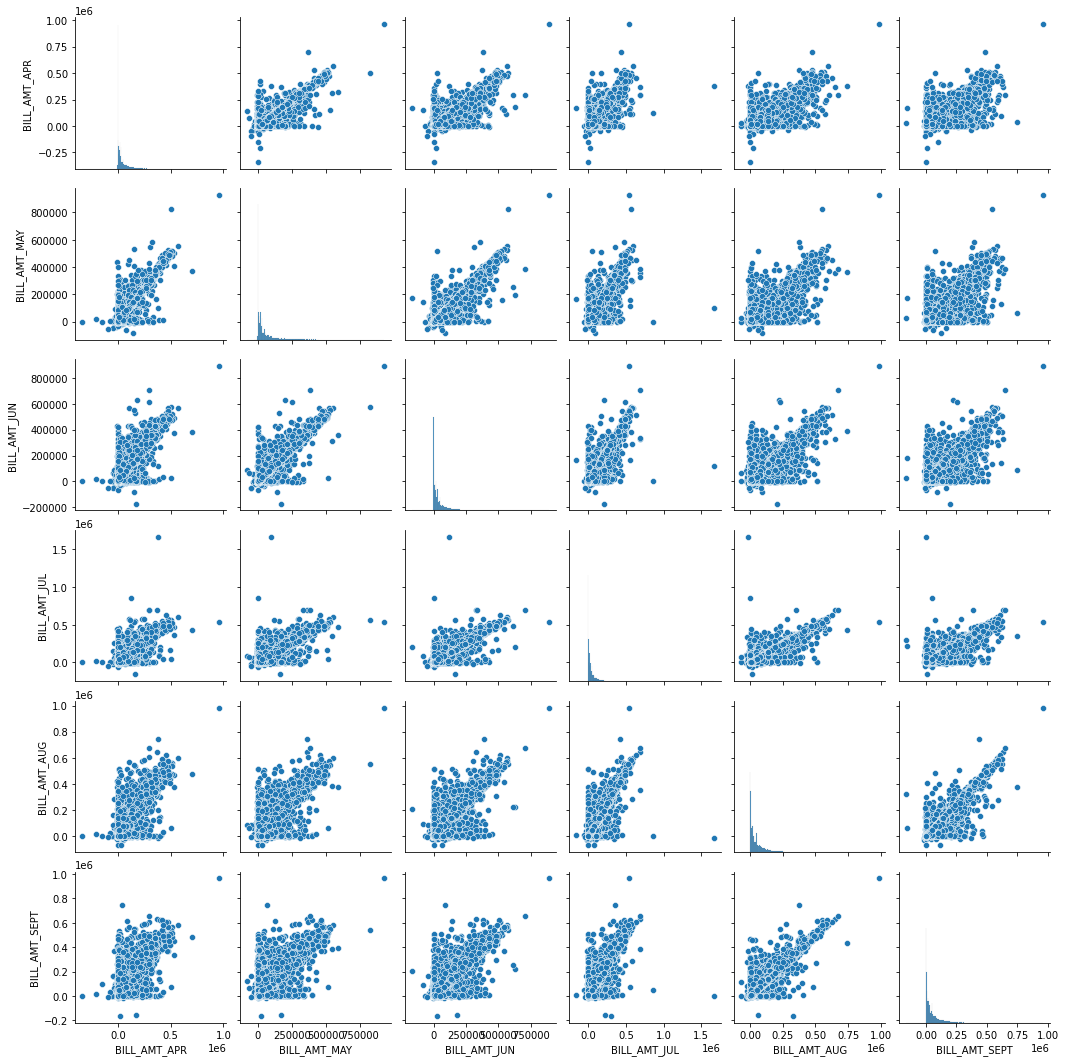

In [38]:
bill_amount=df[['BILL_AMT_APR',  'BILL_AMT_MAY',   'BILL_AMT_JUN',   'BILL_AMT_JUL',   'BILL_AMT_AUG',   'BILL_AMT_SEPT']]

sns.pairplot(data=bill_amount)
plt.show()

###The above pairplot shows that distribution of bill amount statements for each month explicitly for defaulters and non-defaulters.

###**(h)Monthly Payments**

In [39]:
#sepember month payment with defaulter
df.groupby(['PAY_SEPT','Defaulter']).size() 

PAY_SEPT  Defaulter
-2        0             2394
          1              365
-1        0             4732
          1              954
 0        0            12849
          1             1888
 1        0             2436
          1             1252
 2        0              823
          1             1844
 3        0               78
          1              244
 4        0               24
          1               52
 5        0               13
          1               13
 6        0                5
          1                6
 7        0                2
          1                7
 8        0                8
          1               11
dtype: int64

In [40]:
#August month payment with defaulter
df.groupby(['PAY_AUG','Defaulter']).size() 

PAY_AUG  Defaulter
-2       0             3091
         1              691
-1       0             5084
         1              966
 0       0            13227
         1             2503
 1       0               23
         1                5
 2       0             1743
         1             2184
 3       0              125
         1              201
 4       0               49
         1               50
 5       0               10
         1               15
 6       0                3
         1                9
 7       0                8
         1               12
 8       0                1
dtype: int64

In [41]:
#July month payment with defaulter
df.groupby(['PAY_JUL','Defaulter']).size() 

PAY_JUL  Defaulter
-2       0             3328
         1              757
-1       0             5012
         1              926
 0       0            13013
         1             2751
 1       0                3
         1                1
 2       0             1850
         1             1969
 3       0              102
         1              138
 4       0               32
         1               44
 5       0                9
         1               12
 6       0                9
         1               14
 7       0                5
         1               22
 8       0                1
         1                2
dtype: int64

In [42]:
#June month payment with defaulter
df.groupby(['PAY_JUN','Defaulter']).size() 

PAY_JUN  Defaulter
-2       0             3511
         1              837
-1       0             4783
         1              904
 0       0            13439
         1             3016
 1       0                1
         1                1
 2       0             1506
         1             1653
 3       0               70
         1              110
 4       0               23
         1               46
 5       0               17
         1               18
 6       0                3
         1                2
 7       0               10
         1               48
 8       0                1
         1                1
dtype: int64

In [43]:
#May month payment with defaulter
df.groupby(['PAY_MAY','Defaulter']).size() 

PAY_MAY  Defaulter
-2       0             3651
         1              895
-1       0             4642
         1              897
 0       0            13752
         1             3195
 2       0             1203
         1             1423
 3       0               65
         1              113
 4       0               33
         1               51
 5       0                7
         1               10
 6       0                1
         1                3
 7       0               10
         1               48
 8       1                1
dtype: int64

In [44]:
#April month payment with defaulter
df.groupby(['PAY_APR','Defaulter']).size() 

PAY_APR  Defaulter
-2       0             3914
         1              981
-1       0             4765
         1              975
 0       0            13217
         1             3069
 2       0             1365
         1             1401
 3       0               66
         1              118
 4       0               18
         1               31
 5       0                6
         1                7
 6       0                5
         1               14
 7       0                8
         1               38
 8       1                2
dtype: int64

##**Multivariate analysis**

###**(i)Monthly Defaulters**

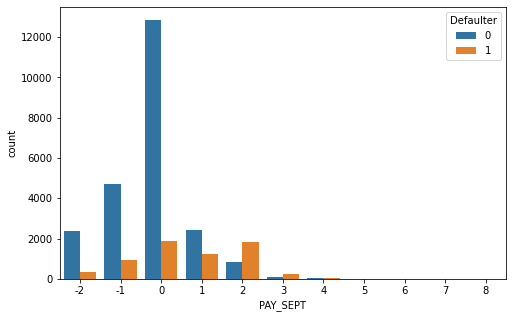

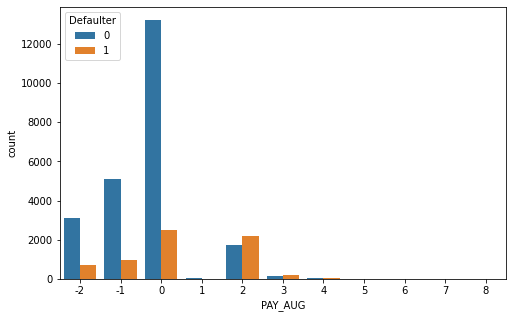

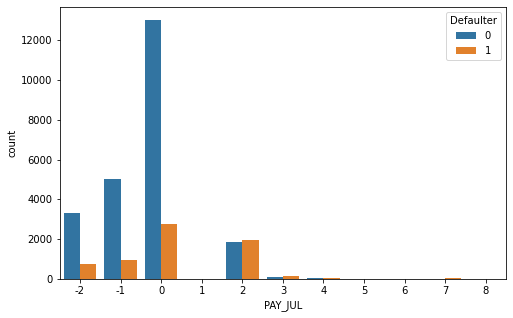

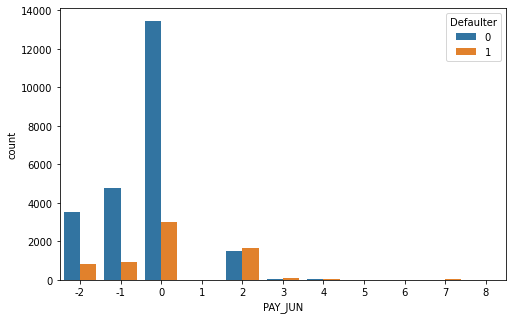

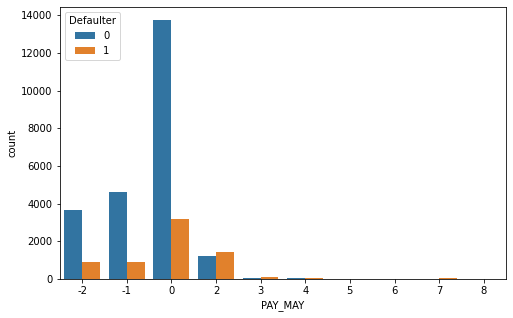

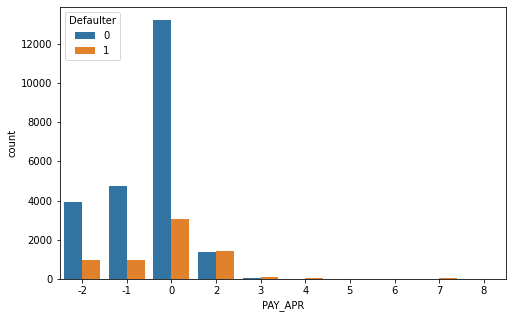

In [45]:
payment=["PAY_SEPT","PAY_AUG", "PAY_JUL",  "PAY_JUN",  "PAY_MAY",  "PAY_APR"]

for col in payment:
  plt.figure(figsize=(8,5))
  sns.countplot(x=col, hue="Defaulter" , data= df)

##From the above data we can conclude that

**PAY_SEPT**:


1.In the payment of september month single rupee not recieve from Non-defaulters were 2394 persons, and from defaulters were 365 persons.

2.Full amount received from Non-defaulters were 4732 persons and defaulters were 954 persons.

3.Minmum amount recevied from Non- defaulters were 12,849 persons and Defaulters were 1888 persons.

**PAY_AUG**:

1.In the payment of september month single rupee not recieve from Non-defaulters were 3,091 persons, and from defaulters were 691 persons.

2.Full amount received from Non-defaulters were 5,084 persons and defaulters were 966 persons.

3.Minmum amount recevied from Non- defaulters were 13,227 persons and Defaulters were 2,503 persons.

**PAY_JUL**

1.In the payment of september month single rupee not recieve from Non-defaulters were 3328 persons, and from defaulters were 757 persons.

2.Full amount received from Non-defaulters were 5012 persons and defaulters were 926 persons.

3.Minmum amount recevied from Non- defaulters were 13,013 persons and Defaulters were 2,751 persons.

**PAY_JUN**

1.In the payment of september month single rupee not recieve from Non-defaulters were 3,511 persons, and from defaulters were 837persons.

2.Full amount received from Non-defaulters were 4,783 persons and defaulters were 904 persons.

3.Minmum amount recevied from Non- defaulters were 13,439persons and Defaulters were 3,016persons.

**PAY_MAY**

1.In the payment of september month single rupee not recieve from Non-defaulters were 3,651persons, and from defaulters were 895persons.

2.Full amount received from Non-defaulters were 4,642 persons and defaulters were 897 persons.

3.Minmum amount recevied from Non- defaulters were 13,752persons and Defaulters were 3,195persons.

**PAY_APR**

1.In the payment of september month single rupee not recieve from Non-defaulters were 3,914persons, and from defaulters were 981persons.

2.Full amount received from Non-defaulters were 4,765 persons and defaulters were 975 persons.

3.Minmum amount recevied from Non- defaulters were 13,217persons and Defaulters were 3,069persons.

 **COMMON POINT** Representing others numbers like 1,2,3,4,5,6,7,8 Delaying payment in months.

###**(ii)The distribution of amount of previous payment for each month**

In [46]:
pay_amount = df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']]

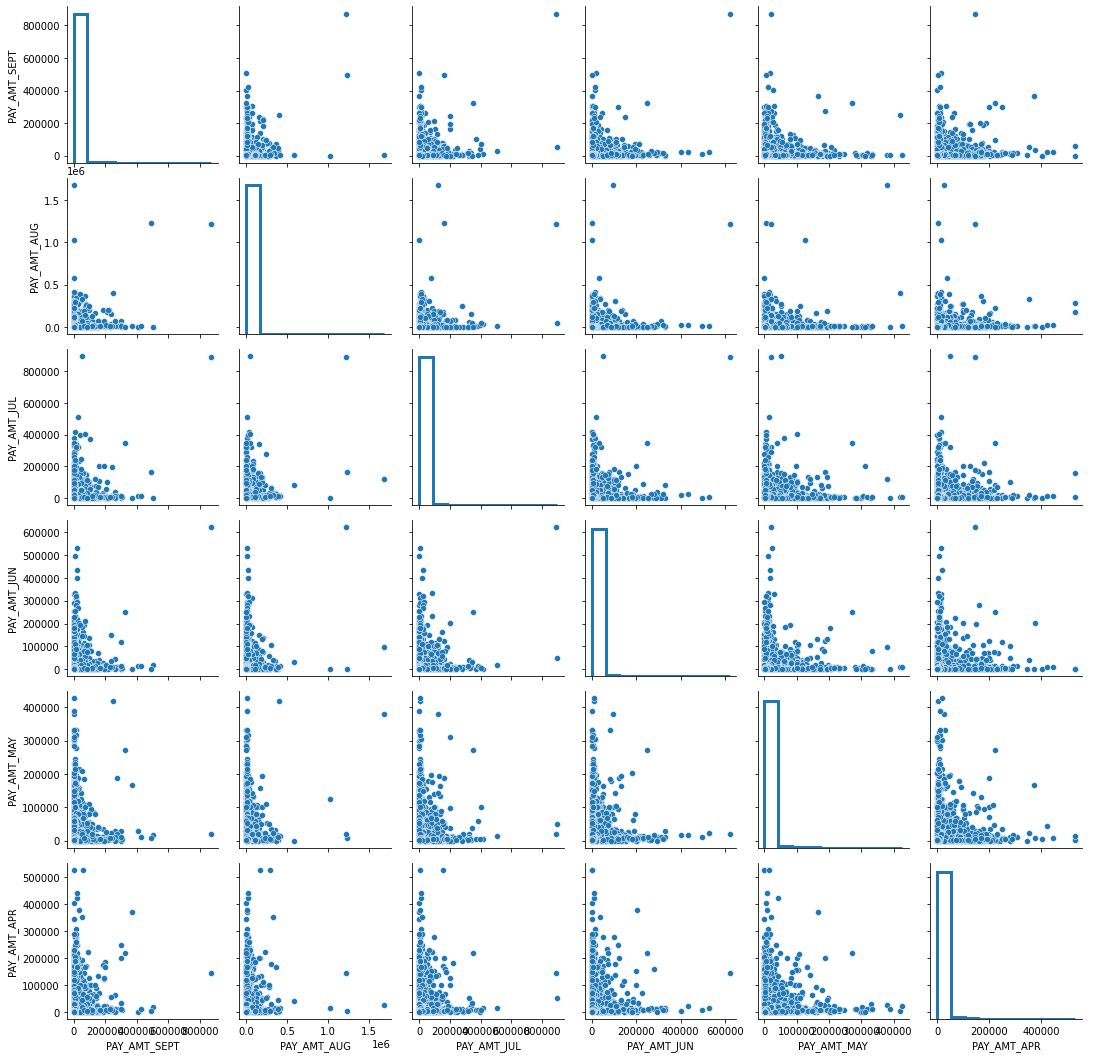

In [47]:
g=sns.PairGrid(pay_amount  ,palette="bright")
g.map_upper(sns.scatterplot)
g.map_lower(sns.scatterplot)
g.map_diag(plt.hist, histtype="step",linewidth=3)
g.add_legend()

###From the pairplot said that each month of the payment states Defaulers and Non-defaulters.

###**(iii)Defaulters vs sex**

In [48]:
df.groupby(['SEX','Defaulter']).size() 

SEX  Defaulter
1    0             9015
     1             2873
2    0            14349
     1             3763
dtype: int64

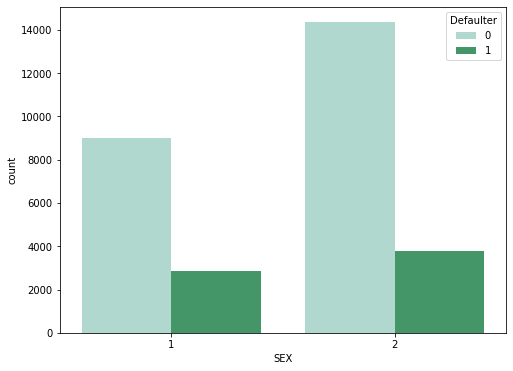

In [49]:
plt.figure(figsize=(8,6))
sns.countplot(x='SEX',hue='Defaulter',data=df,palette='BuGn')
plt.show()

###From the above figure we can conclude that defaultres were females, their number was 3763 and Height Non- defaultrs also females it's number 14,349.

###(iv)**EDUCATION VS Defaulters**

In [50]:
df.groupby(['EDUCATION','Defaulter']).size() 

EDUCATION  Defaulter
1          0             8549
           1             2036
2          0            10700
           1             3330
3          0             3680
           1             1237
4          0              435
           1               33
dtype: int64

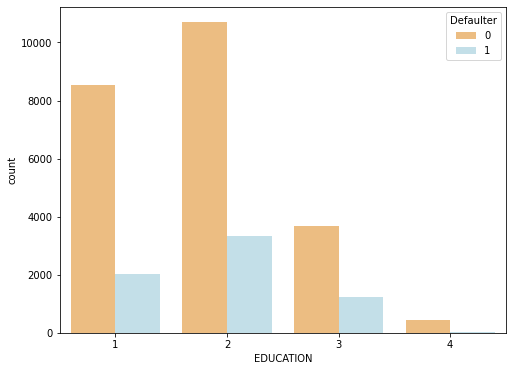

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(x='EDUCATION',hue='Defaulter',data=df,palette='RdYlBu')
plt.show()

From the above data we can conclude that most of the defaulters who did study in University people its number was 3,330 and after that graduate school people are defaulter their number was 2036 

####**(v)MARRIAGE PEOPLE VS Defaulter**

In [52]:
df.groupby(['MARRIAGE','Defaulter']).size() 

MARRIAGE  Defaulter
1         0            10453
          1             3206
2         0            12623
          1             3341
3         0              288
          1               89
dtype: int64

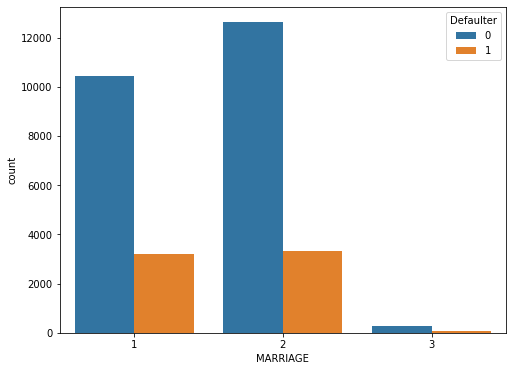

In [53]:
plt.figure(figsize=(8,6))
sns.countplot(x='MARRIAGE',hue='Defaulter',data=df)
plt.show()

From the above data we can conclude that most of the defaulters were singles their numbers was 3341 and defaulters in married people were 3206 and defaulters in others were 89

###**(vi)AGE VS Defaulter**

In [54]:

df.groupby(['AGE','Defaulter']).size() 


AGE  Defaulter
21   0             53
     1             14
22   0            391
     1            169
23   0            684
                 ... 
73   1              3
74   0              1
75   0              2
     1              1
79   0              1
Length: 109, dtype: int64

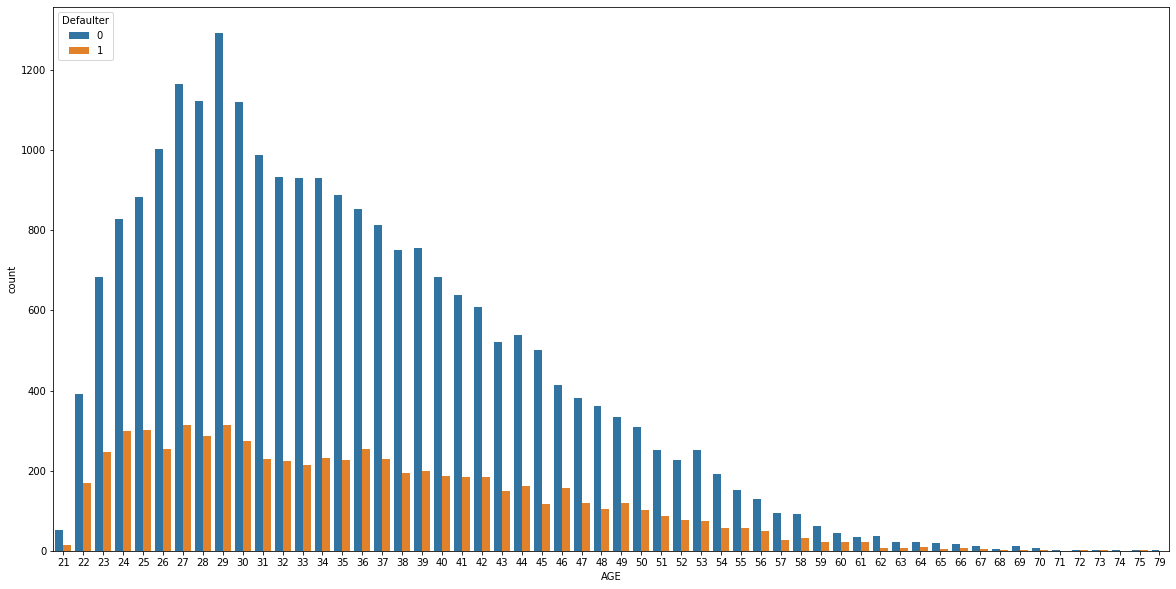

In [55]:
plt.figure(figsize=(20,10))
sns.countplot(x='AGE',hue='Defaulter',data=df)
plt.show()

From the above data we can conclude that

1.most of the 27th age people defaulters 

2.least defaulters were above 60age people were defaulters

In [56]:
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


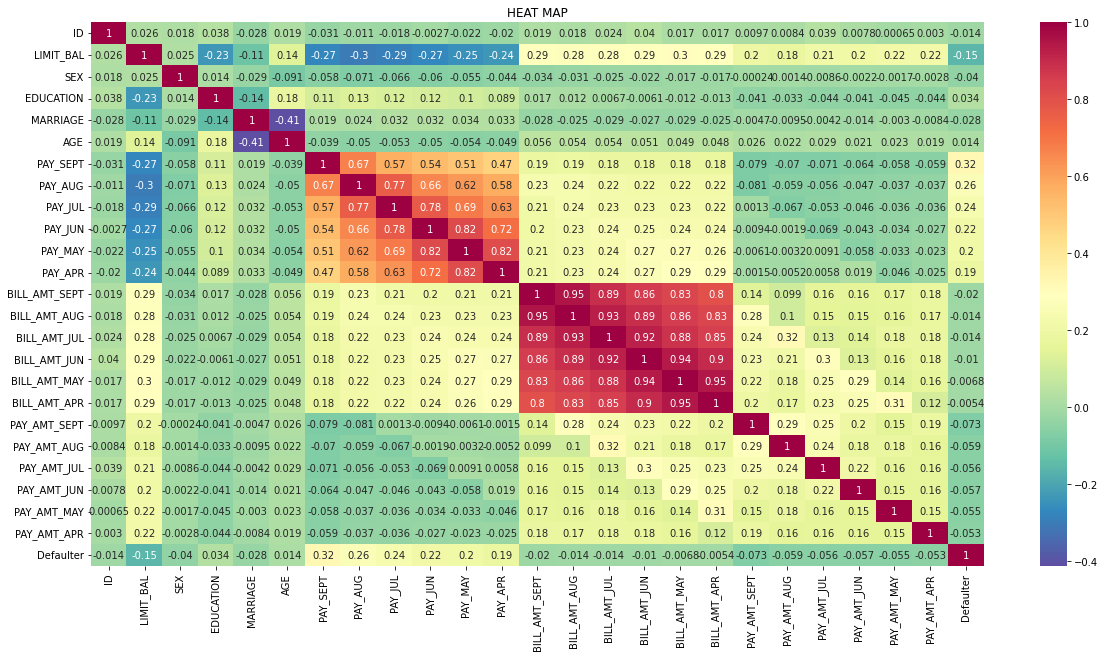

In [57]:
plt.figure (figsize= (20,10))
corelation= df.corr()
sns.heatmap(corelation, annot=True, cmap='Spectral_r')
plt.title("HEAT MAP")
plt.show()

From the above heatmap we can conclude that correlationship between anytwo columns ,some part of data having positive HIGHLY correlation , some part of data having negative correlation , some part of data shows zero correlation
AND those who are multicolinear are need to remove Highely correlated items "PAY_SEPT","BILL_AMT_SEPT","PAY_AMT_SEPT" removed

In [58]:
# dropping unimportant column of ID
df.drop(['ID'], axis=1, inplace=True)

In [59]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [60]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["BILL_AMT_SEPT","PAY_SEPT","PAY_AMT_SEPT"]]])

,variables,VIF
0,LIMIT_BAL,4.003045
1,SEX,9.147414
2,EDUCATION,7.392732
3,MARRIAGE,6.370812
4,AGE,11.344949
5,PAY_AUG,2.688993
6,PAY_JUL,3.683127
7,PAY_JUN,4.426665
8,PAY_MAY,4.983845
9,PAY_APR,3.460441


Highely correlated  items "PAY_SEPT","BILL_AMT_SEPT","PAY_AMT_SEPT" removed

In [61]:
df['Payement_Value'] = df['PAY_SEPT'] + df['PAY_AUG'] + df['PAY_JUL'] + df['PAY_JUN'] + df['PAY_MAY'] + df['PAY_APR']

In [62]:
df.drop(["PAY_SEPT","BILL_AMT_SEPT","PAY_AMT_SEPT" ],axis=1,inplace=True)

In [63]:
df['Defaulter'].value_counts()

0    23364
1     6636
Name: Defaulter, dtype: int64

Here dataset is imbalanced dataset so we need to do the balance using **SMOTE** 

In [64]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter,Payement_Value
0,20000,2,2,1,24,2,-1,-1,-2,-2,...,0,0,0,689,0,0,0,0,1,-2
1,120000,2,2,2,26,2,0,0,0,2,...,3272,3455,3261,1000,1000,1000,0,2000,1,3
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1500,1000,1000,1000,5000,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2019,1200,1100,1069,1000,0,0
4,50000,1,2,1,57,0,-1,0,0,0,...,20940,19146,19131,36681,10000,9000,689,679,0,-2


##**Feature Engineering**

####**ONE HOT ENCODING**

In [65]:
dataset = pd.get_dummies(df,columns=['SEX','MARRIAGE',"EDUCATION"])

In [66]:
dataset.head(1)


,LIMIT_BAL,AGE,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,...,Payement_Value,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4
0,20000,24,2,-1,-1,-2,-2,3102,689,0,...,-2,0,1,1,0,0,0,1,0,0


In [67]:
dataset.shape

(30000, 28)

In [68]:
# creating dependent variable and independent variable
independendent_variable=dataset.drop(['Defaulter'],axis=1)

dependent_variable=dataset['Defaulter']

In [69]:
X=independendent_variable
y=dependent_variable

In [70]:
X.head()

,LIMIT_BAL,AGE,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,...,Payement_Value,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4
0,20000,24,2,-1,-1,-2,-2,3102,689,0,...,-2,0,1,1,0,0,0,1,0,0
1,120000,26,2,0,0,0,2,1725,2682,3272,...,3,0,1,0,1,0,0,1,0,0
2,90000,34,0,0,0,0,0,14027,13559,14331,...,0,0,1,0,1,0,0,1,0,0
3,50000,37,0,0,0,0,0,48233,49291,28314,...,0,0,1,1,0,0,0,1,0,0
4,50000,57,0,-1,0,0,0,5670,35835,20940,...,-2,1,0,1,0,0,0,1,0,0


In [71]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Defaulter, Length: 30000, dtype: int64

In [72]:
# spliting  unbalanced dataset  train and test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.20, random_state =17,stratify = y) 
print(X_train.shape)
print(X_test.shape)

(24000, 27)
(6000, 27)


###**APPLYING SMOTE(Synthetic Minority Oversampling Technique)**

In [73]:
from imblearn.over_sampling import SMOTE

smote= SMOTE()
X_train_sm,y_train_sm = smote.fit_resample(X,y)

from collections import Counter
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_sm))
Counter(y_train_sm)

Original dataset shape Counter({0: 18691, 1: 5309})
Resample dataset shape Counter({1: 23364, 0: 23364})


Counter({0: 23364, 1: 23364})

##**Model evaluations**

In [74]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc,classification_report

In [153]:
def print_metrics(actual, predicted):
  print('accuracy_score is {}'.format(accuracy_score(actual, predicted)))
  print(' precision_score is {}'.format( precision_score(actual, predicted)))
 
  print('recall_score is {}'.format(recall_score(actual, predicted)))
  print('f1_score is {}'.format(f1_score(actual, predicted)))
  print('roc_auc_score is {}'.format( roc_auc_score(actual , predicted)))
  print('confusion_matrix is {}'.format(confusion_matrix(actual, predicted)))
  print('classification_report is {}'.format(classification_report(actual , predicted)))


###**(i)Implementing logistic regression**

In [76]:
# spiliting  balanced dataset as training and testing  after applying SMOTE
X_train_os, X_test_os, y_train_os, y_test_os= train_test_split(X_train_sm,y_train_sm, test_size = 0.20, random_state = 17,stratify = y_train_sm)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [78]:
lr= LogisticRegression()



In [79]:
# fitting logistic regression
param_grid = {'penalty':['l1','l2'], 'C' : [100,150,200] }

log_model= GridSearchCV(lr, param_grid, scoring = 'accuracy', cv =5)
log_model.fit(X_train_os, y_train_os)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 150, 200], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [80]:
optimized_log=log_model.best_estimator_
optimized_log

LogisticRegression(C=200)

In [81]:
log_model.best_params_

{'C': 200, 'penalty': 'l2'}

In [82]:
log_model.best_score_

0.6209405293765873

In [83]:
# model score  on training data
print(f"training_model_score:  {log_model.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {log_model.score(X_test_os,y_test_os)}")

training_model_score:  0.5748221068963673
testing_model_score:  0.5595976888508453


In [84]:
 # to predict the probability
y_train_pred = log_model.predict_proba(X_train_os)[:,1]
y_test_pred = log_model.predict_proba(X_test_os)[:,1]

In [85]:
y_train_pred

array([0.34610891, 0.38339328, 0.21923305, ..., 0.43404903, 0.51051869,
       0.56775204])

In [86]:
y_test_pred

array([0.49191003, 0.3177039 , 0.34621543, ..., 0.5161995 , 0.45813628,
       0.08658424])

Here the probability  said about the NON-Defaulter and defaulters 

In [87]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds = log_model.predict(X_train_os)
y_test_class_preds = log_model.predict(X_test_os)

In [88]:
y_test_class_preds

array([0, 0, 0, ..., 1, 0, 0])

In [89]:
y_test

10867    0
14863    0
26562    0
14294    1
26330    0
        ..
19576    0
2473     0
10168    0
29686    0
12215    0
Name: Defaulter, Length: 6000, dtype: int64

In [154]:
# Evaluation of training model
print_metrics(y_train_os,y_train_class_preds)



accuracy_score is 0.5748221068963673
 precision_score is 0.6263210188781502
recall_score is 0.3709806858916056
f1_score is 0.46596330891741145
roc_auc_score is 0.5748221068963673
confusion_matrix is [[14554  4137]
 [11757  6934]]
classification_report is               precision    recall  f1-score   support

           0       0.55      0.78      0.65     18691
           1       0.63      0.37      0.47     18691

    accuracy                           0.57     37382
   macro avg       0.59      0.57      0.56     37382
weighted avg       0.59      0.57      0.56     37382



[[14554  4137]
 [11757  6934]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

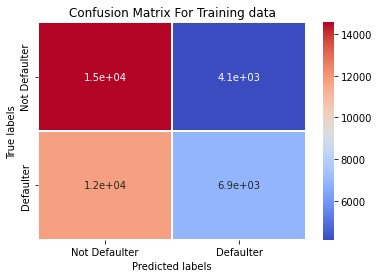

In [91]:
# Get the confusion matrix for  training  data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train_os,y_train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

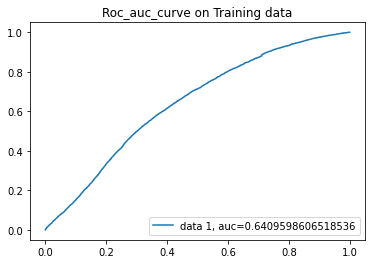

In [92]:
# Roc_auc_curve
y_train_pred = log_model.predict_proba(X_train_os)[:,1]
fpr, tpr, _ = roc_curve(y_train_os,  y_train_pred )
auc = roc_auc_score(y_train_os,  y_train_pred  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [93]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds)

accuracy_score is 0.5595976888508453
 precision_score is 0.6011623683254631
recall_score is 0.3541622084314145
f1_score is 0.4457312146512254
roc_auc_score is 0.5595976888508453
confusion_matrix is [[3575 1098]
 [3018 1655]]
classification_report is               precision    recall  f1-score   support

           0       0.54      0.77      0.63      4673
           1       0.60      0.35      0.45      4673

    accuracy                           0.56      9346
   macro avg       0.57      0.56      0.54      9346
weighted avg       0.57      0.56      0.54      9346



[[3575 1098]
 [3018 1655]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

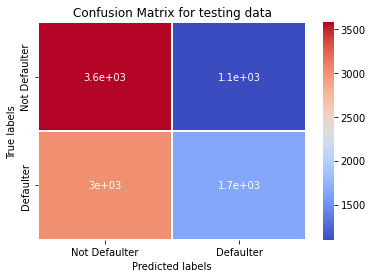

In [152]:
# Get the confusion matrix for  testing data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test_os, y_test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm', ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

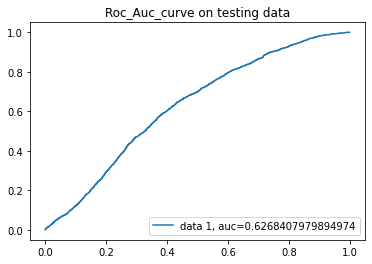

In [95]:
# Roc_auc_curve
y_test_proba= log_model.predict_proba(X_test_os)[:,1]
fpr, tpr, _ = roc_curve(y_test_os,  y_test_proba )
auc = roc_auc_score(y_test_os, y_test_proba )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_Auc_curve on testing data")
plt.legend(loc=4)
plt.show()

We have implemented logistic regression and we getting accuracy_score is approx 62%. and precision score approx is 62% and f1_score is 62%and roc_auc approx is 62% As we have imbalanced dataset,  recall_score is approx 63%  better parameter. Let's go ahead with other models and see if they can give better result.

###**(ii)Implementing Random forest**

In [97]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

In [98]:
rf= RandomForestClassifier() 
grid_values = {'n_estimators':[50,60,70,80,90,100], 'max_depth':[3, 5, 7,9,11,14]}
rf_grid = GridSearchCV(rf, param_grid = grid_values, scoring = 'accuracy', cv=5)

# Fit the object to train dataset
rf_grid.fit(X_train_os, y_train_os)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 14],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='accuracy')

In [99]:
rf_grid.best_params_

{'max_depth': 14, 'n_estimators': 100}

In [100]:
optimized_rf=rf_grid.best_estimator_
optimized_rf

RandomForestClassifier(max_depth=14)

In [101]:
rf_grid.best_score_

0.8621796587831003

In [102]:
# model score  on training data
print(f"training_model_score:  {rf_grid.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {rf_grid.score(X_test_os,y_test_os)}")

training_model_score:  0.9329356374725803
testing_model_score:  0.8598330836721592


In [103]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds_rf = rf_grid.predict(X_train_os)
y_test_class_preds_rf = rf_grid.predict(X_test_os)

In [104]:
y_test_class_preds_rf

array([1, 0, 0, ..., 1, 0, 0])

In [105]:
y_test

10867    0
14863    0
26562    0
14294    1
26330    0
        ..
19576    0
2473     0
10168    0
29686    0
12215    0
Name: Defaulter, Length: 6000, dtype: int64

In [151]:
# Evaluation of training model
print_metrics( y_train_os, y_train_class_preds_rf)

accuracy_score is 0.9329356374725803
 precision_score is 0.9739369802038187
recall_score is 0.8896795249050345
f1_score is 0.929903536977492
roc_auc_score is 0.9329356374725805
confusion_matrix is [[18246   445]
 [ 2062 16629]]
classification_report is               precision    recall  f1-score   support

           0       0.90      0.98      0.94     18691
           1       0.97      0.89      0.93     18691

    accuracy                           0.93     37382
   macro avg       0.94      0.93      0.93     37382
weighted avg       0.94      0.93      0.93     37382



[[18246   445]
 [ 2062 16629]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

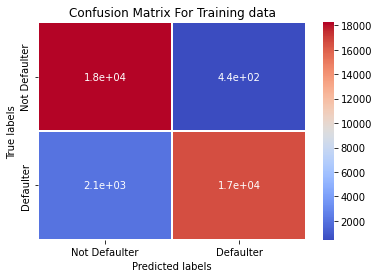

In [107]:
# Get the confusion matrix for  training  data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train_os,y_train_class_preds_rf)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

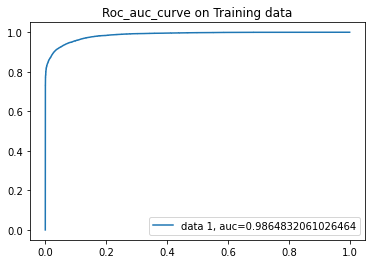

In [108]:
# Roc_auc_curve
y_train_preds_proba_rf = rf_grid.predict_proba(X_train_os)[::,1]

fpr, tpr, _ = roc_curve(y_train_os,  y_train_preds_proba_rf )
auc = roc_auc_score(y_train_os,  y_train_preds_proba_rf  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [109]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds_rf)

accuracy_score is 0.8598330836721592
 precision_score is 0.8959265363786202
recall_score is 0.814252086454098
f1_score is 0.8531390134529147
roc_auc_score is 0.8598330836721592
confusion_matrix is [[4231  442]
 [ 868 3805]]
classification_report is               precision    recall  f1-score   support

           0       0.83      0.91      0.87      4673
           1       0.90      0.81      0.85      4673

    accuracy                           0.86      9346
   macro avg       0.86      0.86      0.86      9346
weighted avg       0.86      0.86      0.86      9346



[[4231  442]
 [ 868 3805]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

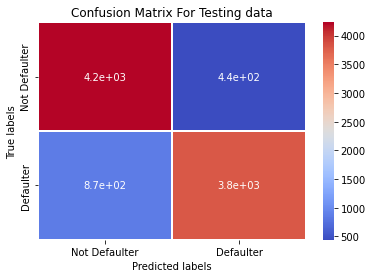

In [110]:
# Get the confusion matrix for  testing data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test_os,y_test_class_preds_rf)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

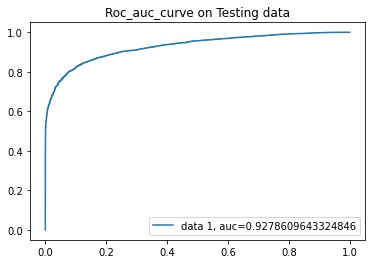

In [111]:
# Roc_auc_curve
y_test_preds_proba_rf = rf_grid.predict_proba(X_test_os)[::,1]

fpr, tpr, _ = roc_curve(y_test_os,  y_test_preds_proba_rf )
auc = roc_auc_score(y_test_os,  y_test_preds_proba_rf  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

We have implemented Random Forest  and we getting accuracy_score is approx 86%. and recall_score is approx 82% and f1_score is 85% and ROC_AUC score is 86% ,precision score is approx 90% better parameter. Let's go ahead with other models and see if they can give better result.

###**(iii)Implementing KNN Classifier**

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
knn = KNeighborsClassifier()

In [115]:
#knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

In [116]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid, scoring = 'accuracy',cv=3)
knn_cv.fit(X_train_os,y_train_os)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20]},
             scoring='accuracy')

In [117]:
knn_cv.best_score_

0.7092183320896456

In [118]:
knn_cv.best_params_

{'n_neighbors': 5}

In [119]:
optimized_knn=knn_cv.best_estimator_
optimized_knn

KNeighborsClassifier()

In [120]:
# model score  on training data
print(f"training_model_score:  {knn_cv.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {knn_cv.score(X_test_os,y_test_os)}")

training_model_score:  0.8343320314589909
testing_model_score:  0.7355018189599829


In [121]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds_knn = knn_cv.predict(X_train_os)
y_test_class_preds_knn = knn_cv.predict(X_test_os)

In [122]:
y_test_class_preds_knn

array([1, 0, 0, ..., 1, 1, 0])

In [123]:
y_test_os

38707    1
26884    1
19454    0
12363    0
4518     0
        ..
19740    0
35793    1
32857    1
17947    0
1027     0
Name: Defaulter, Length: 9346, dtype: int64

In [124]:
# Evaluation of training model
print_metrics(y_train_os,y_train_class_preds_knn)


accuracy_score is 0.8343320314589909
 precision_score is 0.7784511184386418
recall_score is 0.9346744422449307
f1_score is 0.8494396226873799
roc_auc_score is 0.8343320314589909
confusion_matrix is [[13719  4972]
 [ 1221 17470]]
classification_report is               precision    recall  f1-score   support

           0       0.92      0.73      0.82     18691
           1       0.78      0.93      0.85     18691

    accuracy                           0.83     37382
   macro avg       0.85      0.83      0.83     37382
weighted avg       0.85      0.83      0.83     37382



[[13719  4972]
 [ 1221 17470]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

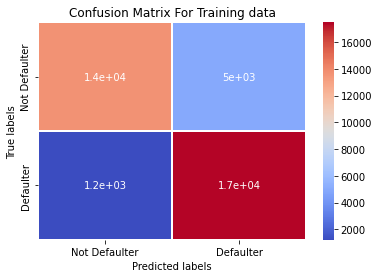

In [125]:
# Get the confusion matrix for  training  data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train_os,y_train_class_preds_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

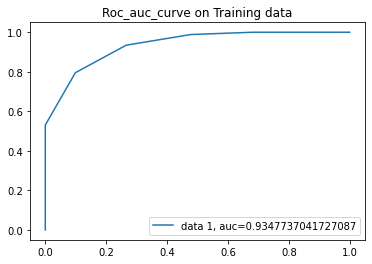

In [126]:
# Roc_auc_curve on taining data
y_train_preds_proba_knn = knn_cv.predict_proba(X_train_os)[::,1]

fpr, tpr, _ = roc_curve(y_train_os,  y_train_preds_proba_knn )
auc = roc_auc_score(y_train_os,  y_train_preds_proba_knn )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [127]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds_knn)

accuracy_score is 0.7355018189599829
 precision_score is 0.6892519346517627
recall_score is 0.8576931307511235
f1_score is 0.7643020594965675
roc_auc_score is 0.7355018189599829
confusion_matrix is [[2866 1807]
 [ 665 4008]]
classification_report is               precision    recall  f1-score   support

           0       0.81      0.61      0.70      4673
           1       0.69      0.86      0.76      4673

    accuracy                           0.74      9346
   macro avg       0.75      0.74      0.73      9346
weighted avg       0.75      0.74      0.73      9346



[[2866 1807]
 [ 665 4008]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

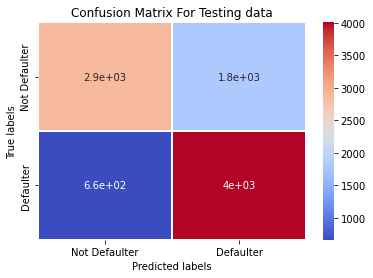

In [128]:
# Get the confusion matrix for  testing data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test_os,y_test_class_preds_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

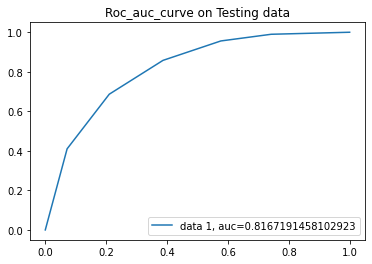

In [129]:
# Roc_auc_curve testing data
y_test_preds_proba_knn = knn_cv.predict_proba(X_test_os)[::,1]

fpr, tpr, _ = roc_curve(y_test_os,  y_test_preds_proba_knn )
auc = roc_auc_score(y_test_os,  y_test_preds_proba_knn )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

We have implemented KNN  and we getting accuracy_score is approx 75%. and precision score  is approx 70% and f1_score is 76% and ROC_AUC score is 75% ,recall_score is approx 88% better parameter

 

###**(iv)Implementing XG boost Algorithm**

In [131]:
from xgboost import  XGBClassifier

In [132]:
param_test1 = {
 'max_depth':range(2,3,6),
 'min_child_weight':range(1,2,6)}

In [133]:
# xg boost with grid search cv
xgb_grid = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1 ,objective= 'binary:logistic'), 
 param_grid = param_test1, scoring='roc_auc', cv=3)

In [134]:
xgb_grid.fit(X_train_os,y_train_os)

GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=5),
             param_grid={'max_depth': range(2, 3, 6),
                         'min_child_weight': range(1, 2, 6)},
             scoring='roc_auc')

In [135]:
xgb_grid.best_params_

{'max_depth': 2, 'min_child_weight': 1}

In [136]:

optimized_xgb=xgb_grid.best_estimator_
optimized_xgb

XGBClassifier(max_depth=2)

In [137]:
xgb_grid.best_score_

0.912667968760859

In [138]:
# model score  on training data
print(f"training_model_score:  {xgb_grid.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {xgb_grid.score(X_test_os,y_test_os)}")

training_model_score:  0.9143939516091439
testing_model_score:  0.910024023982493


In [139]:
# Get the predicted classes
y_train_class_preds_xgb = xgb_grid.predict(X_train_os)
y_test_class_preds_xgb = xgb_grid.predict(X_test_os)

In [140]:
y_test_class_preds_xgb

array([1, 0, 0, ..., 1, 0, 0])

In [141]:
y_test_os

38707    1
26884    1
19454    0
12363    0
4518     0
        ..
19740    0
35793    1
32857    1
17947    0
1027     0
Name: Defaulter, Length: 9346, dtype: int64

In [142]:
# Evaluation of training model
print_metrics(y_train_os,y_train_class_preds_xgb)

accuracy_score is 0.8473061901449895
 precision_score is 0.897398224670952
recall_score is 0.784281204857953
f1_score is 0.8370353451721578
roc_auc_score is 0.8473061901449895
confusion_matrix is [[17015  1676]
 [ 4032 14659]]
classification_report is               precision    recall  f1-score   support

           0       0.81      0.91      0.86     18691
           1       0.90      0.78      0.84     18691

    accuracy                           0.85     37382
   macro avg       0.85      0.85      0.85     37382
weighted avg       0.85      0.85      0.85     37382



[[17015  1676]
 [ 4032 14659]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

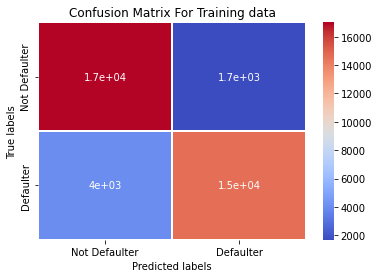

In [143]:
# Get the confusion matrix for  training  data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train_os,y_train_class_preds_xgb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

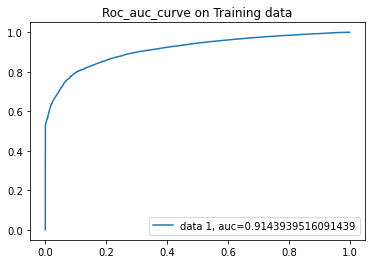

In [144]:
# Roc_auc_curve on taining data
y_train_preds_proba_xgb = xgb_grid.predict_proba(X_train_os)[::,1]

fpr, tpr, _ = roc_curve(y_train_os,  y_train_preds_proba_xgb )
auc = roc_auc_score(y_train_os,  y_train_preds_proba_xgb )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [145]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds_xgb)

accuracy_score is 0.8378985662315429
 precision_score is 0.8881514257620452
recall_score is 0.7731649903702118
f1_score is 0.8266788696945431
roc_auc_score is 0.8378985662315429
confusion_matrix is [[4218  455]
 [1060 3613]]
classification_report is               precision    recall  f1-score   support

           0       0.80      0.90      0.85      4673
           1       0.89      0.77      0.83      4673

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346



[[4218  455]
 [1060 3613]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

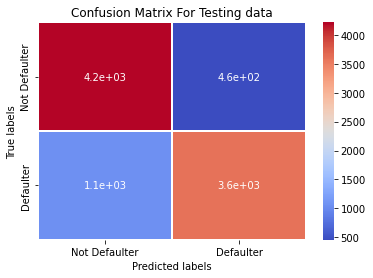

In [146]:
# Get the confusion matrix for  testing data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test_os,y_test_class_preds_xgb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

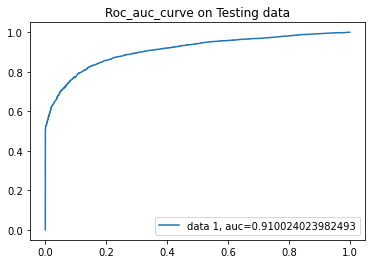

In [147]:
# Roc_auc_curve testing data
y_test_preds_proba_xgb = xgb_grid.predict_proba(X_test_os)[::,1]

fpr, tpr, _ = roc_curve(y_test_os,  y_test_preds_proba_xgb)
auc = roc_auc_score(y_test_os,  y_test_preds_proba_xgb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

We have implemented XGBOOST WITH GRID SEARCH CV and we getting accuracy_score is approx 84%. and recall_score is approx 78% and f1_score is 83% and ROC_AUC score is 84% ,precision score is approx 89% better parameter 

###**Model Summary For Train data**

In [148]:
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"MODEL_NAME", "Train accuracy_score ", "Train Precision_score", "Train Recall_score","Train f1_score",'Train ROC_AUC_Score'])
train.add_row(['1','Logistic Regression','0.6177572093520945','0.6144089822226843',' 0.6323899202824889','0.6232697935616546'," 0.6177572093520945"])
train.add_row(['2','Random_Forest_classifier',' 0.9318121020812156','0.9737614463489082','0.8875394574929111','0.9286533993898173'," 0.9318121020812155"])
train.add_row(['3','KNN_Classifier ','0.8327804825852014','0.7761498845675724','0.9353164624685678','0.8483319179910227',"0.8327804825852015"])
train.add_row(['4','XGBoost_Classifier','0.844818361778396','0.8935637518319492','0.7828901610400728','0.8345738158382526'," 0.8448183617783961"])

print(train)

+-------+--------------------------+-----------------------+-----------------------+---------------------+--------------------+---------------------+
| SL NO |        MODEL_NAME        | Train accuracy_score  | Train Precision_score |  Train Recall_score |   Train f1_score   | Train ROC_AUC_Score |
+-------+--------------------------+-----------------------+-----------------------+---------------------+--------------------+---------------------+
|   1   |   Logistic Regression    |   0.6177572093520945  |   0.6144089822226843  |  0.6323899202824889 | 0.6232697935616546 |  0.6177572093520945 |
|   2   | Random_Forest_classifier |   0.9318121020812156  |   0.9737614463489082  |  0.8875394574929111 | 0.9286533993898173 |  0.9318121020812155 |
|   3   |     KNN_Classifier       |   0.8327804825852014  |   0.7761498845675724  |  0.9353164624685678 | 0.8483319179910227 |  0.8327804825852015 |
|   4   |    XGBoost_Classifier    |   0.844818361778396   |   0.8935637518319492  |  0.782890161040

###**Model summary for Test data**

In [149]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Test accuracy_score  ", "Test Precision_score","Test Recall_score","Test f1_score",'Test ROC_AUC_Score'])
test.add_row(['1','Logistic Regression','0.6196233682858977','0.6176346801346801','0.6280761823239889','0.6228116710875332',"0.6196233682858977"])
test.add_row(['2','Random_Forest_classifier','0.8607960624866253',' 0.896519285042333','0.815750053498823','0.8542296918767507',"0.8607960624866253"])
test.add_row(['3','KNN_Classifier ',' 0.7472715600256794','0.6969490369865349','0.8750267494115129','0.7759013282732449',"0.7472715600256794"])
test.add_row(['4','XGBOOST_Classifier',' 0.8400385191525787',' 0.8864299610894941','0.7800128397175262','0.829823562891292',"0.8400385191525788"])

print(test)

+-------+--------------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+
| SL NO |        MODEL_NAME        | Test accuracy_score   | Test Precision_score | Test Recall_score  |   Test f1_score    | Test ROC_AUC_Score |
+-------+--------------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+
|   1   |   Logistic Regression    |   0.6196233682858977  |  0.6176346801346801  | 0.6280761823239889 | 0.6228116710875332 | 0.6196233682858977 |
|   2   | Random_Forest_classifier |   0.8607960624866253  |   0.896519285042333  | 0.815750053498823  | 0.8542296918767507 | 0.8607960624866253 |
|   3   |     KNN_Classifier       |   0.7472715600256794  |  0.6969490369865349  | 0.8750267494115129 | 0.7759013282732449 | 0.7472715600256794 |
|   4   |    XGBOOST_Classifier    |   0.8400385191525787  |  0.8864299610894941  | 0.7800128397175262 | 0.82982356289

**Conclusion**
 We used diffent type of Classification  algorithms to train our model like, Logistic Regression,  Random Forest Classifier,KNN_Classifier, XGboost_Classifier. and Also we tuned the parameters of Random forest classifier and XGboost classifier ,KNN_  Out of them Random forest classifier ( tuned hyperparameters gave) the best result.
 it's Highest
  
 Precision score is approx 90%,
 
 Recall score is approx 82%
 

ROC_Auc score is approx 86%,

and Accuracy_score is  approx 86%,

and It's F1_score approx is 85% 